### Lv3 모델링 1/4 python 파이썬 랜덤 포레스트 정의

We're going to use Random Forest model.<br>

For now, we're going to classify the wine data.<br>

The parameters of the random forest classifier are:<br>

In [1]:
# Import random forest model
from sklearn.ensemble import RandomForestClassifier

In [2]:
# Assign the classification mode to the variable 'random_forest'
random_forest = RandomForestClassifier()

# Check if the model is loaded properly
print(random_forest)

RandomForestClassifier()


### Lv3 모델링 2/4 python 파이썬 모델 랜덤 포레스트 실습

In [3]:
# Download the data
!wget 'https://bit.ly/3i4n1QB'

import zipfile
with zipfile.ZipFile('3i4n1QB', 'r') as existing_zip:
    existing_zip.extractall('data')

--2022-09-12 16:35:21--  https://bit.ly/3i4n1QB
Resolving bit.ly (bit.ly)... 67.199.248.11, 67.199.248.10
Connecting to bit.ly (bit.ly)|67.199.248.11|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://drive.google.com/uc?export=download&id=1emLrrpFWT8dCoj5BJb12-5QMG2-nruUw [following]
--2022-09-12 16:35:21--  https://drive.google.com/uc?export=download&id=1emLrrpFWT8dCoj5BJb12-5QMG2-nruUw
Resolving drive.google.com (drive.google.com)... 172.217.161.206, 2404:6800:400a:804::200e
Connecting to drive.google.com (drive.google.com)|172.217.161.206|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://doc-10-10-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/8kdiuebr6nm5ae41f9mvps2ktnipk4no/1662968100000/17946651057176172524/*/1emLrrpFWT8dCoj5BJb12-5QMG2-nruUw?e=download&uuid=1825d432-d72e-44de-9028-9f68b7a451b0 [following]
--2022-09-12 16:35:21--  https://doc-10-10-docs.googleuserc

In [4]:
# Import libraries
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.ensemble import RandomForestClassifier

import seaborn as sns
import matplotlib.pyplot as plt

# Set the matplotlib library enable to print the result in Jupyter notebook
%matplotlib inline

import time

In [5]:
# Load data
train = pd.read_csv('data/train.csv')
test = pd.read_csv('data/test.csv')

# Check the information and the shape, first 5 items
print('=========== Train data ===========\n')
print(train.info(), '\n')
print(train.shape, '\n')
print(train.head(), '\n\n')
print('=========== Test data ===========\n')
print(test.info(), '\n')
print(test.shape, '\n')
print(test.head(), '\n')

=========== Train data ===========

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5497 entries, 0 to 5496
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   index                 5497 non-null   int64  
 1   quality               5497 non-null   int64  
 2   fixed acidity         5497 non-null   float64
 3   volatile acidity      5497 non-null   float64
 4   citric acid           5497 non-null   float64
 5   residual sugar        5497 non-null   float64
 6   chlorides             5497 non-null   float64
 7   free sulfur dioxide   5497 non-null   float64
 8   total sulfur dioxide  5497 non-null   float64
 9   density               5497 non-null   float64
 10  pH                    5497 non-null   float64
 11  sulphates             5497 non-null   float64
 12  alcohol               5497 non-null   float64
 13  type                  5497 non-null   object 
dtypes: float64(11), int64(2), object(1)


In [6]:
# See if there are any null value
print(train.isnull().sum(), '\n')
print(test.isnull().sum())

index                   0
quality                 0
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
type                    0
dtype: int64 

index                   0
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
type                    0
dtype: int64


In [7]:
# See the summary of data
train.describe()

,index,quality,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
count,5497.000000,5497.000000,5497.000000,5497.000000,5497.000000,5497.000000,5497.000000,5497.000000,5497.000000,5497.000000,5497.000000,5497.000000,5497.000000
mean,2748.000000,5.818992,7.210115,0.338163,0.318543,5.438075,0.055808,30.417682,115.566491,0.994673,3.219502,0.530524,10.504918
std,1586.991546,0.870311,1.287579,0.163224,0.145104,4.756676,0.034653,17.673881,56.288223,0.003014,0.160713,0.149396,1.194524
min,0.000000,3.000000,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.740000,0.220000,8.000000
25%,1374.000000,5.000000,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,78.000000,0.992300,3.110000,0.430000,9.500000
50%,2748.000000,6.000000,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994800,3.210000,0.510000,10.300000
75%,4122.000000,6.000000,7.700000,0.400000,0.390000,8.100000,0.064000,41.000000,155.000000,0.996930,3.320000,0.600000,11.300000
max,5496.000000,9.000000,15.900000,1.580000,1.660000,65.800000,0.610000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000


<AxesSubplot:>

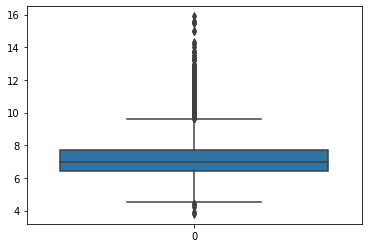

In [8]:
# Check if there are any outliers through visualization

# The features other than the fixed acidity determines the quality of the wine,
# so let's focus on the fixed acidity only
sns.boxplot(data = train['fixed acidity'])

In [9]:
# Declare the scaler, train it
scaler = MinMaxScaler()
scaler.fit(train[['fixed acidity']])

# Change the 'fixed acidity' of the train using scaler
# Save the changed data into a new column 'Scaled fixed acidity'
train['Scaled fixed acidity'] = scaler.transform(train[['fixed acidity']])

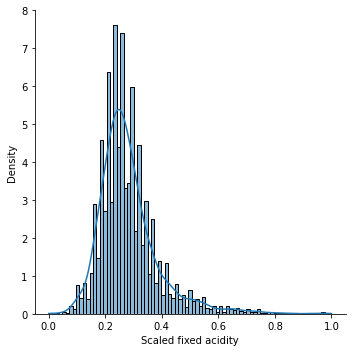

In [10]:
# Visualize the distribution plot for the scaled feature
sns.displot(train['Scaled fixed acidity'], kde=True, stat='density', linewidth=1)

In [11]:
# Enconde the data: One-hot encoding
encoder = OneHotEncoder()
encoder.fit(train[['type']])

onehot = encoder.transform(train[['type']])
print('======= onehot =======\n', onehot, '\n')

onehot_arr = onehot.toarray()
print('======= onehot_arr =======\n', onehot_arr, '\n')

onehot_df = pd.DataFrame(onehot_arr)
print('======= onehot_df =======\n', onehot_df, '\n')

======= onehot =======
   (0, 1)	1.0
  (1, 0)	1.0
  (2, 1)	1.0
  (3, 1)	1.0
  (4, 1)	1.0
  (5, 1)	1.0
  (6, 1)	1.0
  (7, 1)	1.0
  (8, 1)	1.0
  (9, 1)	1.0
  (10, 0)	1.0
  (11, 1)	1.0
  (12, 1)	1.0
  (13, 1)	1.0
  (14, 0)	1.0
  (15, 1)	1.0
  (16, 0)	1.0
  (17, 1)	1.0
  (18, 1)	1.0
  (19, 1)	1.0
  (20, 1)	1.0
  (21, 0)	1.0
  (22, 1)	1.0
  (23, 0)	1.0
  (24, 0)	1.0
  :	:
  (5472, 0)	1.0
  (5473, 1)	1.0
  (5474, 1)	1.0
  (5475, 1)	1.0
  (5476, 1)	1.0
  (5477, 1)	1.0
  (5478, 1)	1.0
  (5479, 0)	1.0
  (5480, 1)	1.0
  (5481, 0)	1.0
  (5482, 1)	1.0
  (5483, 0)	1.0
  (5484, 1)	1.0
  (5485, 1)	1.0
  (5486, 1)	1.0
  (5487, 0)	1.0
  (5488, 1)	1.0
  (5489, 1)	1.0
  (5490, 0)	1.0
  (5491, 1)	1.0
  (5492, 1)	1.0
  (5493, 1)	1.0
  (5494, 1)	1.0
  (5495, 1)	1.0
  (5496, 1)	1.0 

======= onehot_arr =======
 [[0. 1.]
 [1. 0.]
 [0. 1.]
 ...
 [0. 1.]
 [0. 1.]
 [0. 1.]] 

======= onehot_df =======
         0    1
0     0.0  1.0
1     1.0  0.0
2     0.0  1.0
3     0.0  1.0
4     0.0  1.0
...   ...  ...
5492  

In [12]:
# Change the column names from 0, 1 to their feature name
onehot_df.columns = encoder.get_feature_names_out()

# See if the process is done properly
onehot_df.head()

,type_red,type_white
0,0.0,1.0
1,1.0,0.0
2,0.0,1.0
3,0.0,1.0
4,0.0,1.0


In [13]:
# Merge onehot_df into its original data
train = pd.concat([train, onehot_df], axis=1)

# Check if the process is done properly
train.head()

,index,quality,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,type,Scaled fixed acidity,type_red,type_white
0,0,5,5.6,0.695,0.06,6.8,0.042,9.0,84.0,0.99432,3.44,0.44,10.2,white,0.148760,0.0,1.0
1,1,5,8.8,0.610,0.14,2.4,0.067,10.0,42.0,0.99690,3.19,0.59,9.5,red,0.413223,1.0,0.0
2,2,5,7.9,0.210,0.39,2.0,0.057,21.0,138.0,0.99176,3.05,0.52,10.9,white,0.338843,0.0,1.0
3,3,6,7.0,0.210,0.31,6.0,0.046,29.0,108.0,0.99390,3.26,0.50,10.8,white,0.264463,0.0,1.0
4,4,6,7.8,0.400,0.26,9.5,0.059,32.0,178.0,0.99550,3.04,0.43,10.9,white,0.330579,0.0,1.0


In [14]:
# Check the dimension of train
train.shape

(5497, 17)

In [15]:
# Check the type of train
print(type(train))

# Check the features names
print(train.columns)

<class 'pandas.core.frame.DataFrame'>
Index(['index', 'quality', 'fixed acidity', 'volatile acidity', 'citric acid',
       'residual sugar', 'chlorides', 'free sulfur dioxide',
       'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol', 'type',
       'Scaled fixed acidity', 'type_red', 'type_white'],
      dtype='object')


In [16]:
print(train['type'])

0       white
1         red
2       white
3       white
4       white
        ...  
5492    white
5493    white
5494    white
5495    white
5496    white
Name: type, Length: 5497, dtype: object


In [17]:
# Separate feature 'type' from 'train'
# MARK: We need to consider the order of the code.
train_type = train['type']
train = train.drop(columns = ['type'])
print(train_type.shape)
print(train.shape)

(5497,)
(5497, 16)


In [18]:
# See if the process is done properly
print('======== train_type ========\n', train_type.head(), '\n')
print('======== train ========\n', train.head(), '\n')

======== train_type ========
 0    white
1      red
2    white
3    white
4    white
Name: type, dtype: object 

======== train ========
    index  quality  fixed acidity  volatile acidity  citric acid  \
0      0        5            5.6             0.695         0.06   
1      1        5            8.8             0.610         0.14   
2      2        5            7.9             0.210         0.39   
3      3        6            7.0             0.210         0.31   
4      4        6            7.8             0.400         0.26   

   residual sugar  chlorides  free sulfur dioxide  total sulfur dioxide  \
0             6.8      0.042                  9.0                  84.0   
1             2.4      0.067                 10.0                  42.0   
2             2.0      0.057                 21.0                 138.0   
3             6.0      0.046                 29.0                 108.0   
4             9.5      0.059                 32.0                 178.0   

   densi

In [19]:
# Initiate random forest classifier model as variable 'random_classifier'
random_classifier = RandomForestClassifier()

In [20]:
# Store data 'train' to variable 'X' except the feature 'quality'
X = train.drop(columns = ['quality'])

In [21]:
# Store data 'train' to variable 'y' for the feature 'quality'
y = train['quality']

In [22]:
# Train random_classifier using X and y
random_classifier.fit(X, y)

RandomForestClassifier()

### Lv3 모델링 3/4 python 파이썬 교차검증(Cross-validation)

We usually split the data into two different types: Train data and test data.<br>
This 'spliting' process is called 'hold-out'.<br>

